# Autoencoder for Digits

https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [12]:
import pandas as pd
import numpy as np
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

from sklearn.utils import shuffle
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [13]:
# Training data
digits = load_digits()
x = digits.data
x_norm = x.astype('float32') / x.max()
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, train_size=.8, test_size=.2, random_state=1)


In [14]:
x_train.shape

(1437, 64)

In [15]:
x_test.shape

(360, 64)

In [5]:
pd.DataFrame(x_test).to_csv(path_or_buf='output/digits_test.csv',index= False)
pd.DataFrame(y_test).to_csv(path_or_buf='output/digits_test_label.csv',index= False)

# Basic Autoencoder

In [6]:
######### basic autoencoder #############
encoding_dim = 12

input_img = Input(shape=(64,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(64, activation='sigmoid')(encoded)

# implement AE
autoencoder = Model(input_img, decoded)  
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                832       
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________


In [8]:
ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0
                ).history

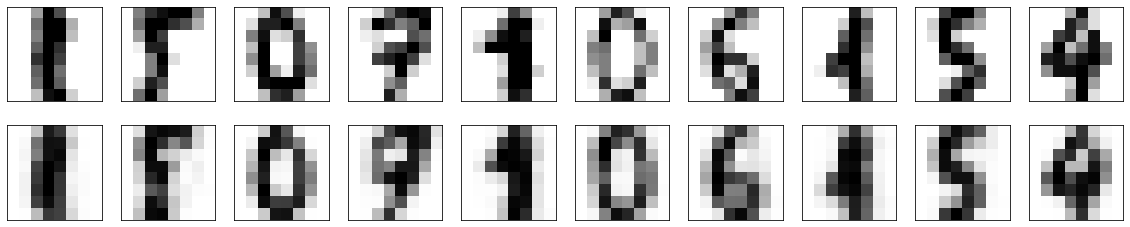

In [9]:
### show image ###

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
#decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8),cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8), cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

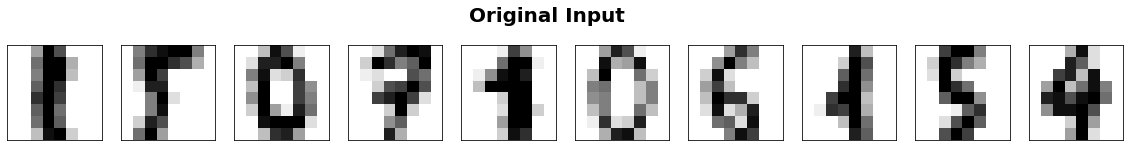

In [10]:
### show original image ###

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8),cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("Original Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

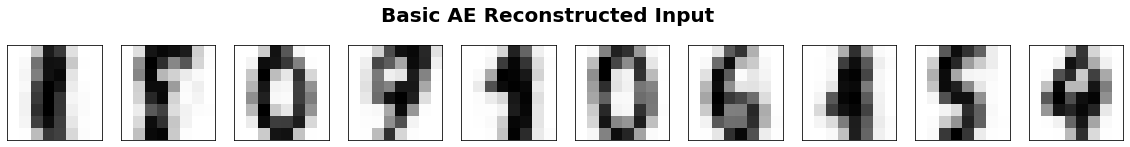

In [11]:
### show reconstruction ###

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(8, 8),cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("Basic AE Reconstructed Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

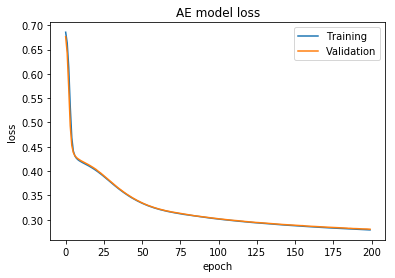

In [12]:
# AE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [13]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_data = pd.DataFrame(encoded_som)
encoded_data.to_csv(path_or_buf='output/digits_AE_encoded.csv',index= False)

# Sparse Autoencoder

In [14]:
######## sparse autoencoder#######


encoding_dim = 12

input_img = Input(shape=(64,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-7))(input_img)
decoded = Dense(64, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0
                ).history

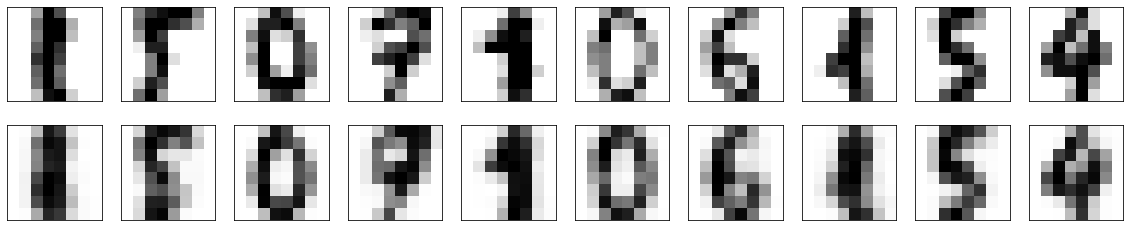

In [15]:
### show image ###

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
#decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8),cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8), cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

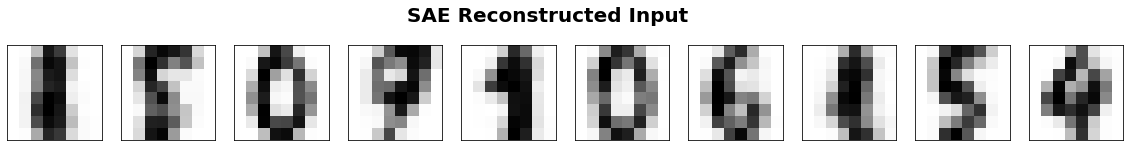

In [16]:
### show reconstruction ###

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(8, 8),cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("SAE Reconstructed Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

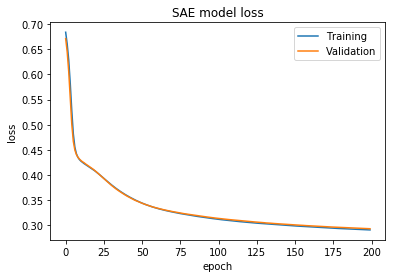

In [17]:
# SAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('SAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [18]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_data = pd.DataFrame(encoded_som)
encoded_data.to_csv(path_or_buf='output/digits_SAE_encoded.csv',index= False)

# Contractive Autoencoder

In [19]:
########### Constractive Autoencoder ############
encoding_dim = 12

input_img = Input(shape=(64,))

encoded = Dense(encoding_dim, activation='relu', name = 'encoded')(input_img)
decoded = Dense(64, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

lam = 10e-6

def contractive_loss(y_pred, y_true):
    
        mse = K.mean(K.square(y_true - y_pred), axis=1)
        W = K.variable(value=autoencoder.get_layer('encoded').get_weights()[0])
        W = K.transpose(W)
        h = autoencoder.get_layer('encoded').output
        dh = h * (1 - h)
        contractive = lam * K.sum(dh**2 * K.sum(W**2, axis=1), axis=1)

        return mse + contractive
    
autoencoder.compile(optimizer='adam', loss= contractive_loss)
ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0
                ).history

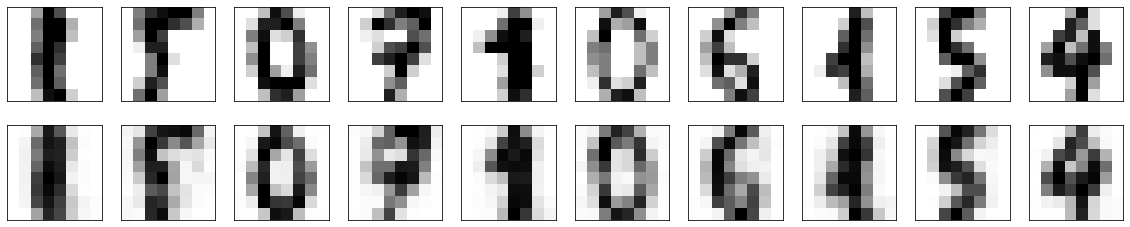

In [20]:
### show image ###

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
#decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8),cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8), cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

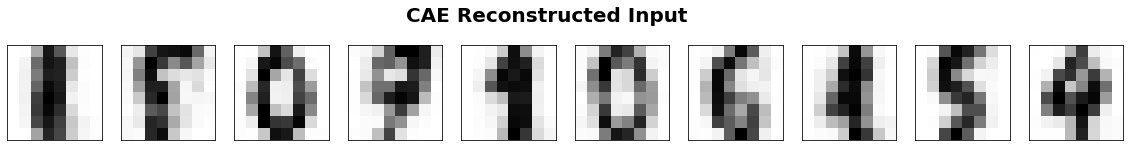

In [21]:
### show reconstruction ###

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(8, 8),cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("CAE Reconstructed Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

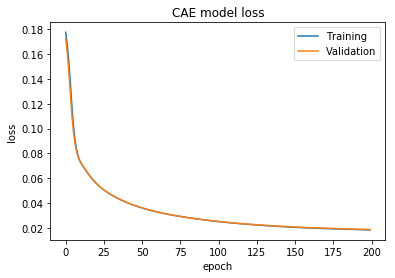

In [22]:
# CAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('CAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [23]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_data = pd.DataFrame(encoded_som)
encoded_data.to_csv(path_or_buf='output/digits_CAE_encoded.csv',index= False)

# Convolutional Autoencoder

In [25]:
######## Convolutional Autoencoder ########

x_train = x_train.reshape(x_train.shape[0],8,8,1)
x_test = x_test.reshape(x_test.shape[0],8,8,1)

In [27]:
x_train[1].shape

(8, 8, 1)

In [28]:
# plt.imshow(x_test[2])

In [29]:
#encoding_dim = 12

input_img = Input(shape=(8, 8, 1))  # adapt this if using `channels_first` image data format
x = input_img
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
shape = K.int_shape(x)
encoded = Flatten()(x)
#encoded = Dense(32, activation='relu', name = 'encoded')(x)

# at this point the representation is (2, 2, 3) i.e. 12-dimensional
#latent_inputs = Input(shape=(encoding_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(encoded)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [30]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 3)           867       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
__________

In [31]:
history = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0)

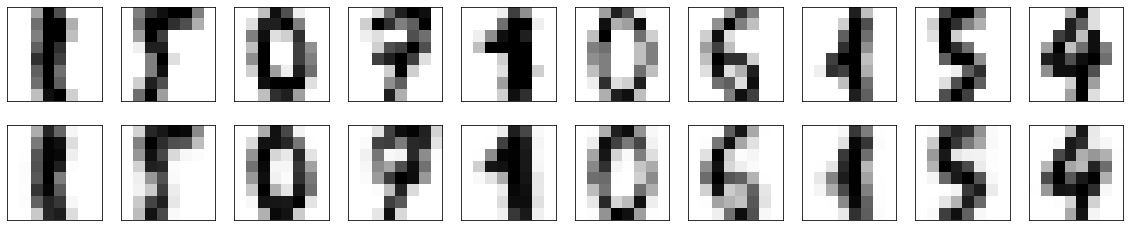

In [32]:
### show image ###

encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8),cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8), cmap=plt.cm.binary)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

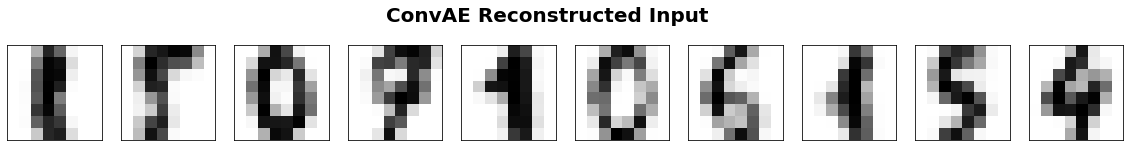

In [33]:
### show reconstruction ###

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(8, 8),cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("ConvAE Reconstructed Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

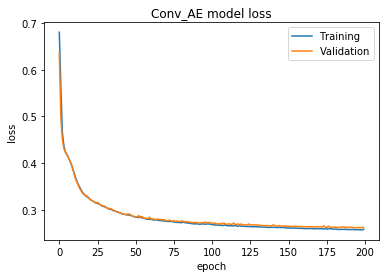

In [34]:
# Convolutional AE loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Conv_AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [35]:
#encoded_imgs = encoded_imgs.reshape(2000,-1)

In [36]:
encoded_imgs.shape

(360, 12)

In [37]:
nonzero = list(map(lambda i: any(encoded_imgs[:,i] != 0), range(encoded_imgs.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_imgs[:,nonzero])

## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_som_nonzero.to_csv(path_or_buf='output/digits_ConAE_encoded.csv',index= False)

# Denoising Autoencoder

In [16]:
########## Denoising Autoencoder ###########

In [49]:
x_train = x_train.reshape(x_train.shape[0],8,8,1)
x_test = x_test.reshape(x_test.shape[0],8,8,1)

# add noise
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

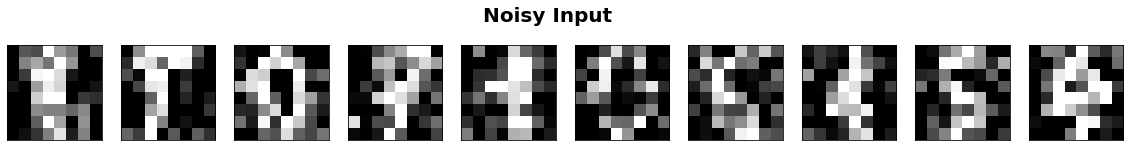

In [50]:
# noisy image
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Noisy Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

In [51]:
#encoding_dim = 12

input_img = Input(shape=(8, 8, 1))  # adapt this if using `channels_first` image data format
x = input_img
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
shape = K.int_shape(x)
encoded = Flatten()(x)
#encoded = Dense(32, activation='relu', name = 'encoded')(x)

# at this point the representation is (2, 2, 3) i.e. 12-dimensional
#latent_inputs = Input(shape=(encoding_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(encoded)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [52]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 32)          320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 2, 2, 3)           867       
_________________________________________________________________
flatten_5 (Flatten)          (None, 12)                0         
__________

In [53]:
ae_train = autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose=0
                )

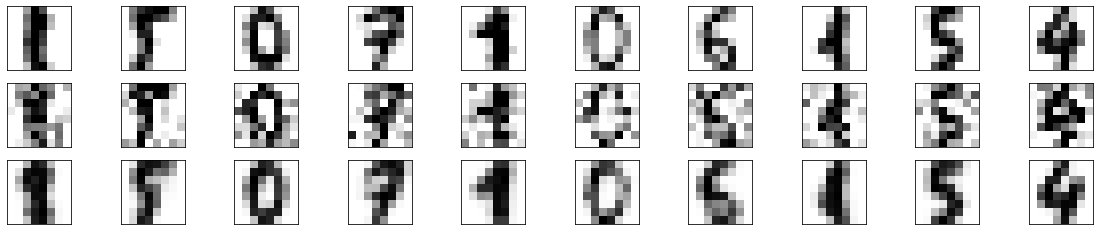

In [54]:

### show image ###

encoded_imgs = encoder.predict(x_test_noisy)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(8, 8),cmap=plt.cm.binary)
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display noisy 
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(x_test_noisy[i].reshape(8, 8),cmap=plt.cm.binary)
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i +2*n+1)
    plt.imshow(decoded_imgs[i].reshape(8, 8),cmap=plt.cm.binary)
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


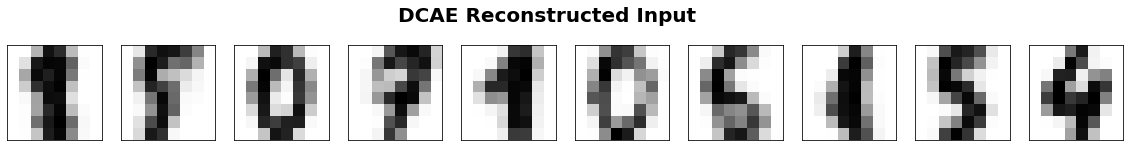

In [55]:
### show reconstruction ###

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(8, 8),cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("DCAE Reconstructed Input", fontsize=20, fontweight='bold', y=1.1)
plt.show()

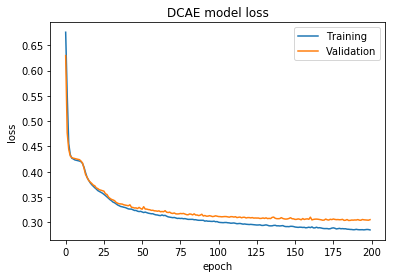

In [56]:
# DCAE loss
plt.plot(ae_train.history['loss'])
plt.plot(ae_train.history['val_loss'])
plt.title('DCAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [48]:
#encoded_imgs = encoded_imgs.reshape(2000,-1)

In [57]:
encoded_imgs.shape

(360, 12)

In [58]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

In [59]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.436650,0.0,3.827486,4.673198,1.382259,0.0,4.288921,0.820328,3.596727,6.815251,3.035156,0.0
1,2.242965,0.0,2.537770,3.798925,2.265816,0.0,4.956522,2.332718,3.406372,6.016576,0.000000,0.0
2,3.181069,0.0,2.044953,5.587925,3.782499,0.0,4.129545,1.734767,1.481368,7.251123,3.240276,0.0
3,0.193285,0.0,2.184468,3.594176,3.778395,0.0,3.461259,2.069394,3.782122,6.702187,3.318148,0.0
4,0.492784,0.0,2.877243,4.641170,2.431679,0.0,2.967497,0.615781,3.475835,6.963091,5.197100,0.0


In [60]:
nonzero = list(map(lambda i: any(encoded_imgs[:,i] != 0), range(encoded_imgs.shape[1])))
encoded_som_nonzero = pd.DataFrame(encoded_imgs[:,nonzero])


## output data
encoded_som_nonzero.to_csv(path_or_buf='output/digits_DCAE_encoded.csv',index= False)

In [61]:
encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7,8,9
355,1.449473,2.795493,3.066738,1.307710,4.400071,0.620966,1.455395,5.741763,3.830714,0.0
356,2.750685,1.287219,6.055292,3.739234,1.555392,0.322029,3.260606,6.826053,3.099507,0.0
357,1.633156,2.863256,4.168836,2.332585,5.875304,1.327431,2.470165,6.158504,4.661795,0.0
358,4.185634,4.554608,4.333230,0.675491,3.024538,0.223527,5.142140,7.729202,2.020968,0.0
359,2.421790,2.733428,5.272152,0.977627,5.116241,1.859553,2.561080,4.624299,0.722985,0.0
